## **HW5: Decision Trees**

In this Homework, you will implement a Decision Tree classifier.
  
To perform predictive and descriptive analytics, you will use the [Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#classification) class in the `scikit-learn`.

  
For this assignment, the stopping condition will be the depth of the tree. The impurity measure can be either `Entropy` or `Gini`.

To test our tree built from the Decision Tree Classifier class, we will use a dataset named Melbourne housing data (that has been cleaned and pruned) and use the files:

   - `melb_train.csv` for training the decision tree (we'll also see what happens if we use the same data to test as we used to train the data in the last problem)
   - `melb_test.csv` for testing the decision tree

There are 10 features in these dataframes that we can use to describe and predict the class label housing "Type", which is 'h' house, 'u' duplex, or 't' townhome.

In [1]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log2
from sklearn import tree # you'll probably need to install this
import graphviz # you'll probably need to install this
import seaborn as sns
sns.set_style('darkgrid')

## **Question 1: Load data**

* Load the training and testing sets into two seperate pandas dataframes, named `df_train` and `df_test`.
* View the first few rows of the data and observe the features.

In [2]:
# Write your code here
df_train = pd.read_csv('melb_tree_train.csv')
df_test = pd.read_csv('melb_tree_test.csv')

In [3]:
# Write your code here
df_train.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,2,t,771000.0,13.8,2.0,1.0,1.0,0.0,99.0,1992.0,Bayside
1,3,t,700000.0,7.9,3.0,2.0,1.0,189.0,110.0,1990.0,Banyule
2,3,u,975000.0,12.1,3.0,2.0,1.0,277.0,109.0,1975.0,Glen Eira
3,3,h,1290000.0,8.0,3.0,1.0,1.0,618.0,132.0,1960.0,Moonee Valley
4,2,u,500000.0,4.2,2.0,1.0,1.0,0.0,86.0,2000.0,Melbourne


# **Q2: Explore the distribution of the target column "Type" in the training data.**

**Q 1.1 Use `value_counts` to get the statistics of `Type` label.**

In [4]:
# Write your code here
type = df_train.Type
print(type.value_counts())

t    281
u    281
h    248
Name: Type, dtype: int64


**Q 1.2**

* Calculate the frequency of type `t`, type `u` and type `h`
* Print each frequency

In [5]:
# Write your code here
t_freq = type.value_counts()['t']/ len(type)
print(t_freq)

u_freq = type.value_counts()['u']/ len(type)
print(u_freq)

h_freq = type.value_counts()['h']/ len(type)
print(h_freq)

0.3469135802469136
0.3469135802469136
0.30617283950617286


## **Q2. Feature Engineering**

**Q2.1 Using the training dataset:**

* Extract the feature columns and save them in a dataframe named `df_features`
* Extract the target column and save it in a dataframe named `df_target`

In [6]:
# Write your code here
df_features = df_train.drop('Type', axis = 1)
df_target = df_train['Type']



**Q2.2 Extract the categorical data from the features dataframe, store them into a new dataframe named `categorical_variables` and print the results**


In [7]:
# Write your code here
categorical_variables = df_features.select_dtypes(include = 'object')
print(categorical_variables)



       CouncilArea
0          Bayside
1          Banyule
2        Glen Eira
3    Moonee Valley
4        Melbourne
..             ...
805      Glen Eira
806          Yarra
807       Moreland
808    Maribyrnong
809        Bayside

[810 rows x 1 columns]


# **Q3. Build a decision tree classifier.**

* Using [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree) create a multi class classifer for the data set using the Gini impurity measure and a max depth of 3.

* Note that `scikit-learn`'s algorithm doesn't handle categorical data, so you will need to encode categorical data using one hot encoding.
For this question, you will use `df_features` and `df_target` that you created above.


In [8]:
# Write your code here
#categorical_variables = pd.get_dummies(categorical_variables)
df_features = pd.get_dummies(df_features)
#print(categorical_variables.shape)
#print(df_features.shape)
#print(df_target.shape)
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
clf = clf.fit(df_features, df_target)


# **Q4. Visualize the Tree model you have implemented above.**

* Display graphviz version of the tree

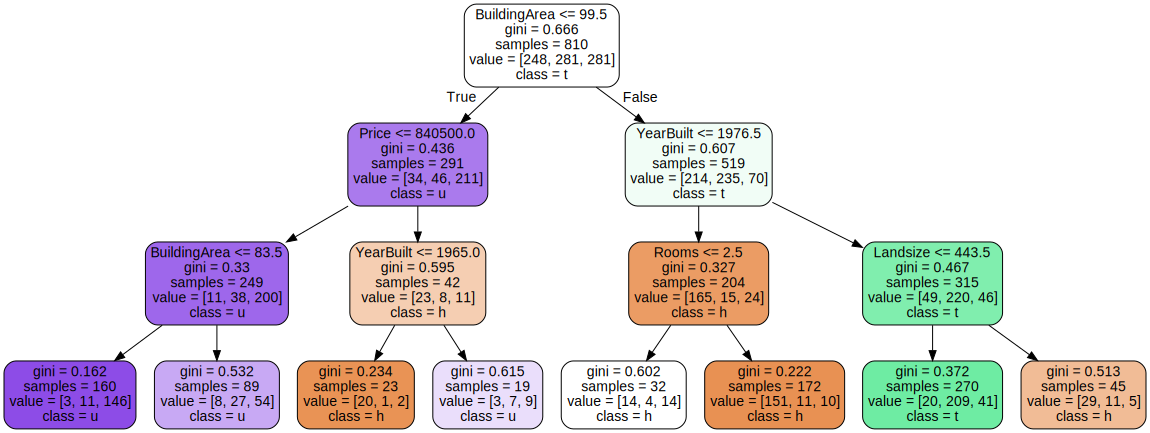

In [9]:
# Write your code here
t = tree.export_text(clf, feature_names=list(df_features.columns))


graph_data = tree.export_graphviz(clf, out_file=None,
                                  feature_names=list(df_features.columns),
                                  class_names=list(set(df_target)),
                                   filled=True, rounded=True)
graph = graphviz.Source(graph_data, )
graph

# **Q5. Making predictions**

**Q5.1 Preprocess the test dataset as you did for the training set**

*  Separate the features and target for test dataset
*  One hot encode the categorical data

In [10]:
#Write your code here
df_test_features = df_test.drop('Type', axis = 1)
df_test_target = df_test['Type']

categorical_variables = df_test_features.select_dtypes(include = 'object')
df_test_features = pd.get_dummies(df_test_features)



**Q5.2 Extract one sample from the testing data, make a prediction, and visualize the prediction path**

In [11]:
# # Now, let's extract a random data instance from df_test
import random
random_instance_index = random.randint(0, len(df_test_features) - 1)
random_instance = df_test_features.iloc[random_instance_index, :]




# Visualize the prediction node path
node_indicator = clf.decision_path([random_instance])

# Get the indices of the nodes visited along the decision path
node_indices = node_indicator.indices

# Extract the node names and conditions for the decision path
decision_path_info = []



# Complete the code below
# Get the feature index used at this node
# Check if it's not a leaf node (-2 represents leaf nodes) and if so,
# get the feature name and threshold (condition) used at this node
for i in node_indices:
  if random_instance_index < node_indicator.shape[0] and node_indicator.toarray()[random_instance_index, i] == 1:
    if clf.tree_.children_left[i] != -1:
      feature_index = clf.tree_.feature[i]
      feature_name = df_test_features.columns[feature_index]
      limit = clf.tree_.limit[i]
      #conditioin = f"If {feature_name} <= {limit}"
      decision_path_info.append((i,feature_name, condition))





# Print the extracted decision path information
for node_index, feature_name, condition in decision_path_info:
  print(f"Node {node_index}: {condition}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Q5.3 Get the predicted result for the test set**

In [12]:
from sklearn.metrics import accuracy_score

predictions = clf.predict(df_test_features)  # Replace df_test with your test dataset
# Calculate the accuracy by comparing predictions with actual target labels
accuracy = accuracy_score(df_test_target, predictions)  # Replace df_test_target with your actual target labels

print("Accuracy:", accuracy)

Accuracy: 0.7857142857142857
